In [1]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
# from torchvision.utils import save_image
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hyper-parameters
image_size = 784
h_dim = 400
z_dim = 20
num_epochs = 15
batch_size = 128
learning_rate = 1e-3

In [3]:
# MNIST dataset
dataset = torchvision.datasets.MNIST(root='data/',
                                     train=True,
                                     transform=transforms.ToTensor(),
                                     download=True)

# Data loader
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)

In [4]:
# VAE model
class VAE(nn.Module):
    def __init__(self, image_size=784, h_dim=400, z_dim=20):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(image_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, image_size)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return F.sigmoid(self.fc5(h))
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var
model = VAE().to(device)

In [5]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
# Start training
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(data_loader):
        # Forward pass
        x = x.to(device).reshape(-1, image_size)
        x_reconst, mu, log_var = model(x)

        # Compute reconstruction loss and kl divergence
        # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
        reconst_loss = F.binary_cross_entropy(x_reconst, x, size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

        # Backprop and optimize
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 10 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}" 
                   .format(epoch + 1, num_epochs, i + 1, len(data_loader), reconst_loss.item(), kl_div.item()))

/home/sunxin/miniconda3/envs/qhmtorch/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/sunxin/miniconda3/envs/qhmtorch/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch[1/15], Step [10/469], Reconst Loss: 37740.8555, KL Div: 1798.6213
Epoch[1/15], Step [20/469], Reconst Loss: 29012.0176, KL Div: 1156.0276
Epoch[1/15], Step [30/469], Reconst Loss: 27721.3379, KL Div: 1266.7258
Epoch[1/15], Step [40/469], Reconst Loss: 27496.0859, KL Div: 623.0237
Epoch[1/15], Step [50/469], Reconst Loss: 27344.0078, KL Div: 570.0269
Epoch[1/15], Step [60/469], Reconst Loss: 25651.9805, KL Div: 874.6756
Epoch[1/15], Step [70/469], Reconst Loss: 24326.7012, KL Div: 1017.8434
Epoch[1/15], Step [80/469], Reconst Loss: 24102.8691, KL Div: 1060.4421
Epoch[1/15], Step [90/469], Reconst Loss: 23295.4609, KL Div: 1351.4631
Epoch[1/15], Step [100/469], Reconst Loss: 22085.7578, KL Div: 1405.9507
Epoch[1/15], Step [110/469], Reconst Loss: 20905.8926, KL Div: 1500.4385
Epoch[1/15], Step [120/469], Reconst Loss: 20078.9023, KL Div: 1495.3447
Epoch[1/15], Step [130/469], Reconst Loss: 20287.6035, KL Div: 1679.9824
Epoch[1/15], Step [140/469], Reconst Loss: 19691.8184, KL Div: 

Epoch[3/15], Step [230/469], Reconst Loss: 11279.9180, KL Div: 3002.1382
Epoch[3/15], Step [240/469], Reconst Loss: 11606.2031, KL Div: 3093.1689
Epoch[3/15], Step [250/469], Reconst Loss: 11981.4688, KL Div: 3090.7104
Epoch[3/15], Step [260/469], Reconst Loss: 11476.4658, KL Div: 2941.3228
Epoch[3/15], Step [270/469], Reconst Loss: 12069.5498, KL Div: 3078.3970
Epoch[3/15], Step [280/469], Reconst Loss: 11580.1650, KL Div: 3087.9292
Epoch[3/15], Step [290/469], Reconst Loss: 10972.2070, KL Div: 2955.0886
Epoch[3/15], Step [300/469], Reconst Loss: 11546.9355, KL Div: 3038.3921
Epoch[3/15], Step [310/469], Reconst Loss: 11556.1738, KL Div: 3064.8076
Epoch[3/15], Step [320/469], Reconst Loss: 11562.6875, KL Div: 2985.3674
Epoch[3/15], Step [330/469], Reconst Loss: 11088.9941, KL Div: 3122.2715
Epoch[3/15], Step [340/469], Reconst Loss: 11468.8711, KL Div: 2997.9771
Epoch[3/15], Step [350/469], Reconst Loss: 11055.3965, KL Div: 2996.1033
Epoch[3/15], Step [360/469], Reconst Loss: 11415.50

Epoch[5/15], Step [450/469], Reconst Loss: 10619.1807, KL Div: 3135.7598
Epoch[5/15], Step [460/469], Reconst Loss: 10797.3545, KL Div: 3223.0081
Epoch[6/15], Step [10/469], Reconst Loss: 10805.0762, KL Div: 3162.7700
Epoch[6/15], Step [20/469], Reconst Loss: 10878.7236, KL Div: 3159.0806
Epoch[6/15], Step [30/469], Reconst Loss: 10550.5391, KL Div: 3207.9429
Epoch[6/15], Step [40/469], Reconst Loss: 10705.5518, KL Div: 3133.4788
Epoch[6/15], Step [50/469], Reconst Loss: 11107.6299, KL Div: 3274.9458
Epoch[6/15], Step [60/469], Reconst Loss: 11031.3066, KL Div: 3146.7227
Epoch[6/15], Step [70/469], Reconst Loss: 10435.3945, KL Div: 3208.8533
Epoch[6/15], Step [80/469], Reconst Loss: 10447.3145, KL Div: 3202.1809
Epoch[6/15], Step [90/469], Reconst Loss: 10789.8945, KL Div: 3160.6426
Epoch[6/15], Step [100/469], Reconst Loss: 11026.4961, KL Div: 3288.9580
Epoch[6/15], Step [110/469], Reconst Loss: 11043.3867, KL Div: 3132.1416
Epoch[6/15], Step [120/469], Reconst Loss: 10731.0723, KL Di

Epoch[8/15], Step [210/469], Reconst Loss: 10664.0117, KL Div: 3261.8735
Epoch[8/15], Step [220/469], Reconst Loss: 10387.2061, KL Div: 3230.9878
Epoch[8/15], Step [230/469], Reconst Loss: 10220.1230, KL Div: 3195.6631
Epoch[8/15], Step [240/469], Reconst Loss: 10307.7383, KL Div: 3203.2595
Epoch[8/15], Step [250/469], Reconst Loss: 10721.4121, KL Div: 3159.6187
Epoch[8/15], Step [260/469], Reconst Loss: 10975.5811, KL Div: 3300.1047
Epoch[8/15], Step [270/469], Reconst Loss: 10979.5918, KL Div: 3200.2361
Epoch[8/15], Step [280/469], Reconst Loss: 10162.4404, KL Div: 3266.4167
Epoch[8/15], Step [290/469], Reconst Loss: 10668.8535, KL Div: 3172.8291
Epoch[8/15], Step [300/469], Reconst Loss: 10727.4775, KL Div: 3179.8770
Epoch[8/15], Step [310/469], Reconst Loss: 9937.4141, KL Div: 3170.7656
Epoch[8/15], Step [320/469], Reconst Loss: 10399.9785, KL Div: 3118.6182
Epoch[8/15], Step [330/469], Reconst Loss: 10000.6045, KL Div: 3110.5415
Epoch[8/15], Step [340/469], Reconst Loss: 10497.930

Epoch[10/15], Step [430/469], Reconst Loss: 10263.3486, KL Div: 3211.5078
Epoch[10/15], Step [440/469], Reconst Loss: 10342.8867, KL Div: 3235.4329
Epoch[10/15], Step [450/469], Reconst Loss: 10609.6875, KL Div: 3237.0791
Epoch[10/15], Step [460/469], Reconst Loss: 10561.2773, KL Div: 3242.2583
Epoch[11/15], Step [10/469], Reconst Loss: 10465.3398, KL Div: 3080.9346
Epoch[11/15], Step [20/469], Reconst Loss: 10313.2129, KL Div: 3205.6494
Epoch[11/15], Step [30/469], Reconst Loss: 9985.9395, KL Div: 3269.6357
Epoch[11/15], Step [40/469], Reconst Loss: 9809.3301, KL Div: 3132.9868
Epoch[11/15], Step [50/469], Reconst Loss: 10396.8066, KL Div: 3317.9473
Epoch[11/15], Step [60/469], Reconst Loss: 10358.9600, KL Div: 3163.3726
Epoch[11/15], Step [70/469], Reconst Loss: 10704.8564, KL Div: 3317.0610
Epoch[11/15], Step [80/469], Reconst Loss: 9845.1963, KL Div: 3207.2957
Epoch[11/15], Step [90/469], Reconst Loss: 10249.4248, KL Div: 3152.3257
Epoch[11/15], Step [100/469], Reconst Loss: 10159.

Epoch[13/15], Step [170/469], Reconst Loss: 9550.9053, KL Div: 3157.5466
Epoch[13/15], Step [180/469], Reconst Loss: 9938.2354, KL Div: 3121.9614
Epoch[13/15], Step [190/469], Reconst Loss: 9817.1113, KL Div: 3174.6572
Epoch[13/15], Step [200/469], Reconst Loss: 10407.4111, KL Div: 3147.9771
Epoch[13/15], Step [210/469], Reconst Loss: 10226.3848, KL Div: 3259.4590
Epoch[13/15], Step [220/469], Reconst Loss: 10079.1201, KL Div: 3261.5703
Epoch[13/15], Step [230/469], Reconst Loss: 10324.0391, KL Div: 3213.6611
Epoch[13/15], Step [240/469], Reconst Loss: 10397.9756, KL Div: 3271.1311
Epoch[13/15], Step [250/469], Reconst Loss: 10107.7363, KL Div: 3182.0117
Epoch[13/15], Step [260/469], Reconst Loss: 10135.4346, KL Div: 3310.2300
Epoch[13/15], Step [270/469], Reconst Loss: 10530.1436, KL Div: 3311.3521
Epoch[13/15], Step [280/469], Reconst Loss: 10351.5957, KL Div: 3235.7854
Epoch[13/15], Step [290/469], Reconst Loss: 10235.3740, KL Div: 3194.0508
Epoch[13/15], Step [300/469], Reconst Los

Epoch[15/15], Step [370/469], Reconst Loss: 10241.6484, KL Div: 3210.5330
Epoch[15/15], Step [380/469], Reconst Loss: 10209.1660, KL Div: 3190.0989
Epoch[15/15], Step [390/469], Reconst Loss: 10110.5293, KL Div: 3260.5461
Epoch[15/15], Step [400/469], Reconst Loss: 10416.2461, KL Div: 3282.9731
Epoch[15/15], Step [410/469], Reconst Loss: 9860.9365, KL Div: 3117.5310
Epoch[15/15], Step [420/469], Reconst Loss: 9955.3359, KL Div: 3177.5771
Epoch[15/15], Step [430/469], Reconst Loss: 10450.8203, KL Div: 3373.6338
Epoch[15/15], Step [440/469], Reconst Loss: 10431.3633, KL Div: 3140.9524
Epoch[15/15], Step [450/469], Reconst Loss: 9851.7510, KL Div: 3263.5271
Epoch[15/15], Step [460/469], Reconst Loss: 10182.3340, KL Div: 3250.8943


TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

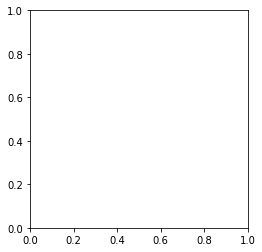

In [7]:
with torch.no_grad():
    # Save the sampled images
    z = torch.randn(batch_size, z_dim).to(device)
    out = model.decode(z).reshape(-1, 1, 28, 28)
    for i in range(5):
        plt.figure()
        plt.imshow(out[i].reshape(28, 28))
        plt.show()
    # save_image(out, os.path.join(sample_dir, 'sampled-{}.png'.format(epoch + 1)))

    # Save the reconstructed images
    out, _, _ = model(x)
    x_concat = torch.cat([x.reshape(-1, 1, 28, 28), out.reshape(-1, 1, 28, 28)], dim=3)
    for i in range(5):
        plt.figure()
        plt.imshow(x_concat[i].reshape(28, 56))
        plt.show()
    # save_image(x_concat, os.path.join(sample_dir, 'reconst-{}.png'.format(epoch + 1)))